In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
pd.set_option('display.max_columns', 500)

# Load training data

In [23]:
train = pd.read_csv('data/train.csv')
train.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1238,1239,20,RL,63.0,13072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,6,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1141,1141,GasA,Ex,Y,SBrkr,1141,0,0,1141,0,0,1,1,3,1,TA,6,Typ,0,NaN,Detchd,2005.0,Unf,2,484,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2006,WD,Abnorml,142500
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000
903,904,20,RL,50.0,14859,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,27.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1670,1670,GasA,Ex,Y,SBrkr,1670,0,0,1670,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,690,TA,TA,Y,144,60,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial,240000
786,787,50,RM,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,5,6,1915,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,PConc,Fa,TA,No,LwQ,686,Unf,0,0,686,GasA,TA,Y,SBrkr,966,686,0,1652,1,0,2,0,4,1,TA,7,Typ,0,NaN,Detchd,1961.0,Unf,1,416,TA,TA,Y,0,0,196,0,0,0,NaN,NaN,Shed,1200,6,2010,WD,Normal,139000
1254,1255,60,RL,60.0,6931,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,2Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,Stone,92.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,746,746,GasA,Ex,Y,SBrkr,760,896,0,1656,0,0,2,1,3,1,Gd,7,Typ,1,Gd,BuiltIn,2003.0,Fin,2,397,TA,TA,Y,178,128,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,165400
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,1Story,5,5,1955,1993,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,CBlock,TA,TA,No,LwQ,379,BLQ,768,470,1617,GasA,Ex,Y,FuseA,1867,0,0,1867,1,0,1,0,2,1,TA,7,Typ,3,Gd,Attchd,1955.0,Fin,1,303,TA,TA,Y,476,0,0,0,142,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
1055,1056,20,RL,104.0,11361,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,BrkFace,160.0,TA,TA,CBlock,Gd,TA,No,ALQ,644,Unf,0,549,1193,GasA,TA,Y,SBrkr,1523,0,0,1523,0,1,2,0,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Fin,2,478,TA,TA,Y,0,0,0,0,189,0,NaN,MnPrv,NaN,0,5,2008,COD,Abnorml,180000
780,781,20,RL,63.0,7875,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,BrkFace,38.0,TA,TA,PConc,Gd,Gd,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1253,0,0,1253,0,0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1995.0,Fin,2,402,TA,TA,Y,220,21,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,176000
1399,1400,50,RL,51.0,6171,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,6,6,1925,1990,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,264,Unf,0,712,976,GasA,Ex,Y,SBrkr,1160,448,0,1608,0,0,2,1,3,1,Gd,7,Typ,1,Gd,Detchd,1925.0,Unf,1,216,Fa,TA,Y,147,16,0,0,0,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,137450
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,E

In [24]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Analyze missing values

In [25]:
null_values = train.isnull().sum()
null_values[null_values > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

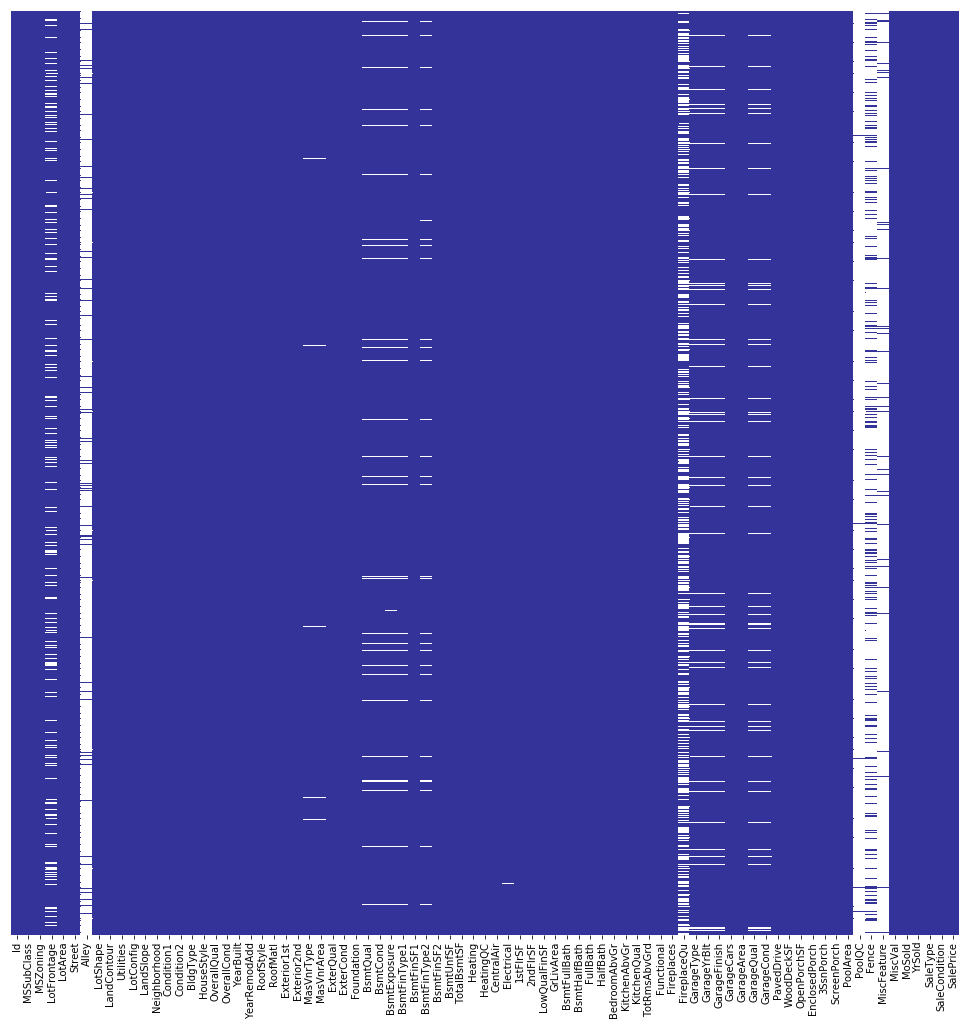

In [26]:
fig = plt.figure(figsize=(17, 17))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='terrain')

# Load test data

In [27]:
test = pd.read_csv('data/test.csv')
test.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1383,2844,80,RL,42.0,10385,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,SLvl,6,6,1978,1978,Gable,CompShg,HdBoard,HdBoard,BrkFace,123.0,TA,TA,CBlock,TA,Gd,Av,ALQ,595.0,LwQ,400.0,0.0,995.0,GasA,TA,Y,SBrkr,1282,0,0,1282,0.0,1.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1989.0,Unf,3.0,672.0,Fa,TA,Y,386,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
459,1920,20,RL,82.0,11070,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1991,1991,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,BLQ,55.0,Unf,0.0,1527.0,1582.0,GasA,TA,Y,SBrkr,1595,0,0,1595,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2.0,672.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,COD,Abnorml
134,1595,50,RL,51.0,9839,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Feedr,Norm,1Fam,1.5Fin,5,2,1931,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,Fa,No,Unf,0.0,Unf,0.0,894.0,894.0,GasA,Ex,Y,SBrkr,894,772,0,1666,1.0,0.0,1,0,3,1,TA,7,Typ,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,156,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1167,2628,60,RL,59.0,16023,Pave,NaN,IR1,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,600.0,Gd,Ex,PConc,Ex,TA,Gd,GLQ,1218.0,Unf,0.0,180.0,1398.0,GasA,Ex,Y,SBrkr,1414,1384,0,2798,1.0,0.0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,670.0,TA,TA,Y,182,37,0,0,0,0,NaN,NaN,NaN,0,3,2006,New,Partial
659,2120,50,RM,60.0,5520,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,5,7,1920,1997,Gable,CompShg,AsbShng,AsbShng,None,0.0,TA,Gd,BrkTil,TA,TA,No,ALQ,68.0,Unf,0.0,497.0,565.0,GasA,TA,Y,SBrkr,565,651,0,1216,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,BuiltIn,1920.0,RFn,1.0,355.0,Fa,TA,Y,0,0,180,0,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal
480,1941,60,RL,73.0,11184,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,932.0,932.0,GasA,Gd,Y,SBrkr,932,701,0,1633,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1998.0,Fin,2.0,460.0,TA,TA,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Family
128,1589,50,RL,89.0,11792,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,5,1948,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,744.0,744.0,GasA,Ex,N,FuseF,792,328,0,1120,0.0,0.0,1,0,2,1,Fa,5,Typ,0,NaN,Detchd,1956.0,Unf,2.0,480.0,TA,Fa,P,0,0,0,0,160,0,NaN,NaN,NaN,0,6,2010,WD,Abnorml
1204,2665,20,RL,61.0,7740,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,9,5,2006,2006,Hip,CompShg,MetalSd,MetalSd,BrkFace,518.0,Gd,TA,PConc,Ex,Gd,No,GLQ,1023.0,Unf,0.0,663.0,1686.0,GasA,Ex,Y,SBrkr,1686,0,0,1686,1.0,0.0,2,0,1,1,Ex,6,Typ,1,Gd,Attchd,2006.0,Fin,3.0,899.0,TA,TA,Y,266,100,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,Partial
1199,2660,60,RL,82.0,11643,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Hip,CompShg,MetalSd,MetalSd,BrkFace,142.0,Gd,TA,PConc,Ex,TA,Av,GLQ,880.0,Unf,0.0,644.0,1524.0,GasA,Ex,Y,SBrkr,1544,814,0,2358,1.0,0.0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2005.0,Fin,3.0,784.0,TA,TA,Y,120,34,0,0,0,0,NaN,NaN,NaN,0,8,2006,New,Partial
1122,2583,120,RM,59.0,5568,Pave,NaN,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,TwnhsE,1Sto

# Analyze missing values

In [28]:
null_values = test.isnull().sum()
null_values[null_values > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

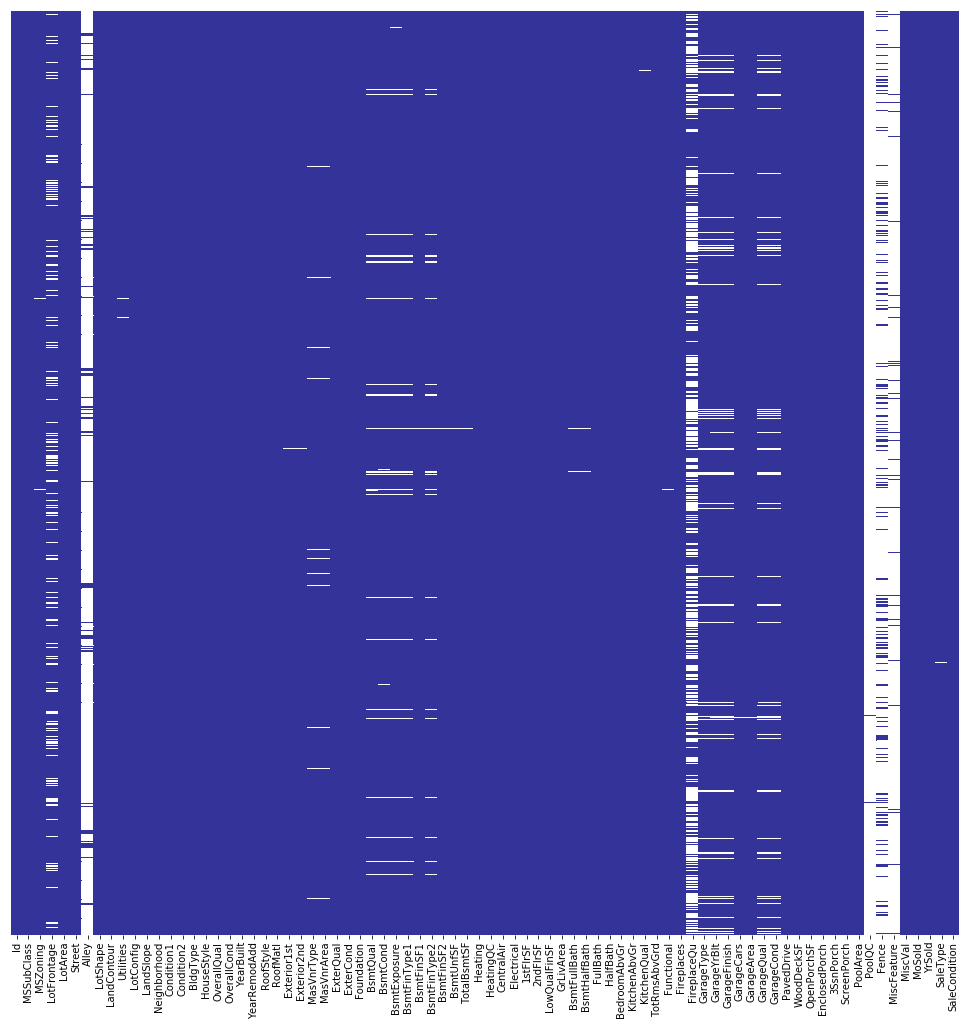

In [29]:
fig = plt.figure(figsize=(17, 17))
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='terrain')

# Combine training and testing data for preprocessing

In [30]:
all_data = pd.concat([train, test], axis=0)
all_data.sample(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,Id,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SalePrice,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1064,1009,0,0,NaN,3,1Fam,NaN,Av,755.0,0.0,ALQ,Unf,0.0,0.0,TA,240.0,Y,Norm,Norm,SBrkr,0,TA,TA,Plywood,VinylSd,MnPrv,Fa,1,CBlock,2,Typ,576.0,2.0,TA,Unf,TA,Detchd,1977.0,1009,0,GasA,TA,SLvl,2525,1,TA,Lvl,Gtl,9720,Inside,72.0,Reg,0,80,RL,51.0,BrkFace,NaN,0,6,CollgCr,0,7,5,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,995.0,AllPub,0,1977,1977,2007
1416,755,755,0,NaN,3,1Fam,TA,No,305.0,0.0,BLQ,Unf,0.0,0.0,TA,450.0,Y,Norm,Norm,SBrkr,164,TA,TA,MetalSd,MetalSd,NaN,NaN,0,PConc,1,Typ,216.0,1.0,TA,Unf,TA,Detchd,1920.0,1510,0,GasA,Ex,2Story,2877,1,TA,HLS,Gtl,4899,Corner,69.0,Reg,0,70,RL,0.0,None,NaN,0,6,SWISU,0,8,6,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,755.0,AllPub,0,1920,1950,2006
154,1200,0,0,NaN,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,1200.0,Y,Norm,Norm,FuseA,228,TA,TA,Wd Sdng,Wd Sdng,NaN,NaN,0,BrkTil,1,Typ,312.0,1.0,Fa,Unf,Fa,Detchd,1923.0,1200,0,GasA,TA,1Story,155,1,TA,Lvl,Gtl,11340,Corner,84.0,Reg,0,30,RM,0.0,None,NaN,0,3,OldTown,0,5,6,Y,0,NaN,CompShg,Gable,Family,125000.0,WD,0,Pave,7,1200.0,AllPub,0,1923,1950,2006
361,988,517,0,Pave,3,1Fam,TA,No,399.0,0.0,Rec,Unf,1.0,0.0,TA,484.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,NaN,0,CBlock,1,Typ,240.0,1.0,TA,Unf,TA,Detchd,1940.0,1505,0,GasA,Gd,1.5Fin,362,1,TA,Lvl,Gtl,9144,Inside,NaN,Reg,0,50,RL,0.0,None,NaN,0,7,BrkSide,0,5,5,N,0,NaN,CompShg,Gable,Normal,145000.0,WD,0,Pave,8,883.0,AllPub,0,1940,1982,2008
730,1152,0,0,NaN,2,Duplex,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,N,Norm,Norm,FuseF,0,TA,TA,WdShing,Wd Shng,NaN,NaN,0,Slab,2,Typ,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1152,0,GasA,TA,1Story,2191,2,TA,Lvl,Gtl,6845,Inside,74.0,Reg,0,90,RL,58.0,BrkCmn,NaN,0,7,Edwards,0,5,4,N,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,6,0.0,AllPub,0,1955,1955,2008
801,1321,0,0,NaN,1,TwnhsE,TA,Gd,926.0,0.0,GLQ,Unf,1.0,0.0,Gd,386.0,Y,Norm,Norm,SBrkr,140,TA,Gd,CemntBd,CmentBd,NaN,TA,1,PConc,1,Typ,484.0,2.0,TA,RFn,TA,Attchd,1990.0,1321,0,GasA,Gd,1Story,2262,1,Gd,HLS,Gtl,5118,Inside,35.0,IR1,0,120,RL,0.0,None,NaN,0,8,StoneBr,64,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,4,1312.0,AllPub,0,1990,1990,2007
1184,1572,0,0,NaN,3,1Fam,TA,Gd,1159.0,0.0,Rec,Unf,1.0,0.0,TA,413.0,Y,Norm,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,NaN,TA,2,CBlock,1,Typ,995.0,3.0,TA,RFn,TA,2Types,1963.0,1572,1,GasA,Gd,1Story,1185,1,TA,Lvl,Mod,35133,Inside,50.0,Reg,0,20,RL,226.0,BrkFace,NaN,0,5,Timber,263,4,5,Y,0,NaN,CompShg,Hip,Normal,186700.0,WD,263,Grvl,5,1572.0,AllPub,0,1963,1963,2007
826,1816,0,0,NaN,3,1Fam,TA,Gd,1151.0,0.0,GLQ,Unf,1.0,0.0,Ex,639.0,Y,Norm,Norm,SBrkr,0,TA,Ex,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,730.0,3.0,TA,Fin,TA,Attchd,2007.0,1816,0,GasA,Ex,1Story,2287,1,Ex,Lvl,Gtl,12469,FR2,96.0,Reg,0,20,RL,378.0,Stone,NaN,0,8,NridgHt,36,5,9,Y,0,NaN,CompShg,Hip,Partial,NaN,New,0,Pave,7,1790.0,AllPub,186,2006,2007,2007
1162,1074,990,0,NaN,4,1Fam,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,Gd,1074.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,NaN,Gd,1,PConc,2,Typ,527.0,2.0,TA,Fin,TA,Attchd,2005.0,2064,1,GasA,Ex,2Story,2623,1,Gd,HLS,Gtl,13128,CulDSac,50.0,IR1,0,60,RL,216.0,BrkFace,NaN,0,1,Gilbert,119,5,8,Y,0,NaN,CompShg,Gable,Normal,NaN,WD,0,Pave,7,1074.0,AllPub,0,2005,2005,2006
434,1560,0,0,NaN,2,1Fam,TA,No,546.0,0.0,Rec,Unf,

In [31]:
null_values = all_data.isnull().sum()
null_values[null_values > 0]

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

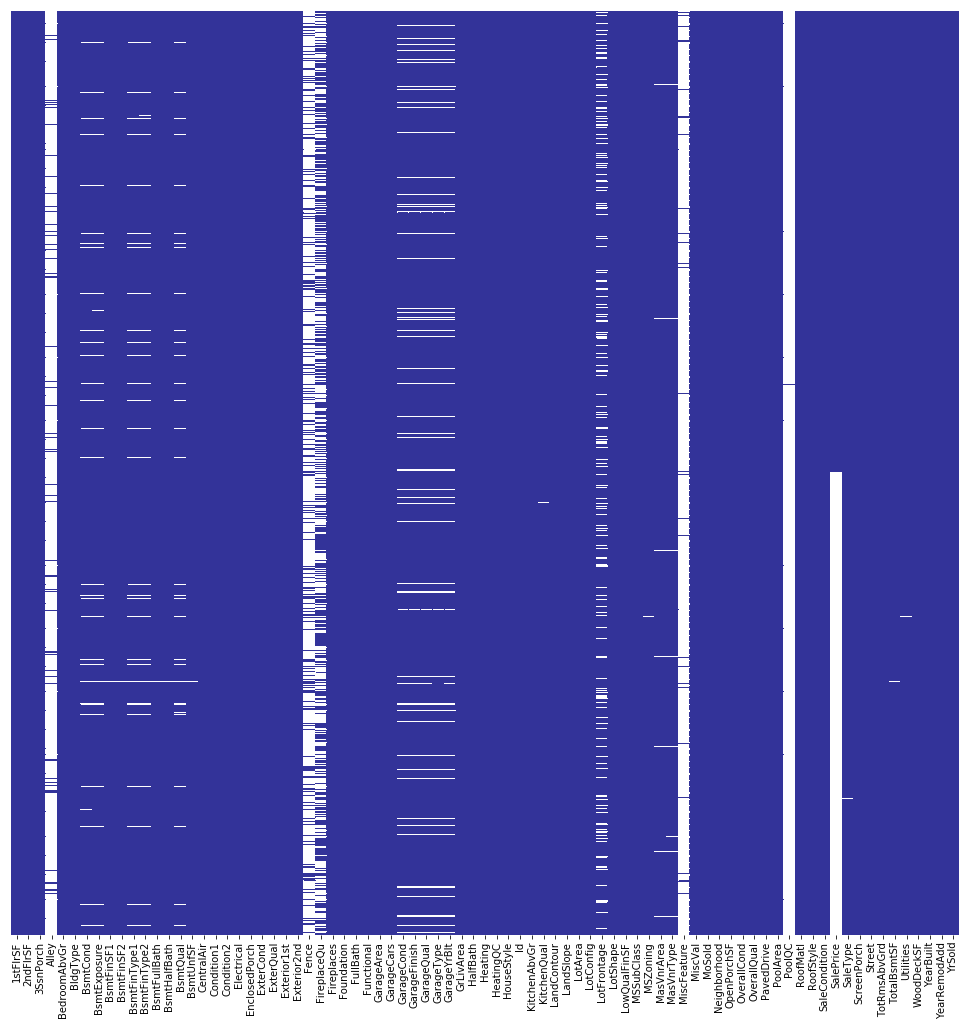

In [32]:
fig = plt.figure(figsize=(17, 17))
sns.heatmap(all_data.isnull(), cbar=False, yticklabels=False, cmap='terrain')

# Rows with missing values

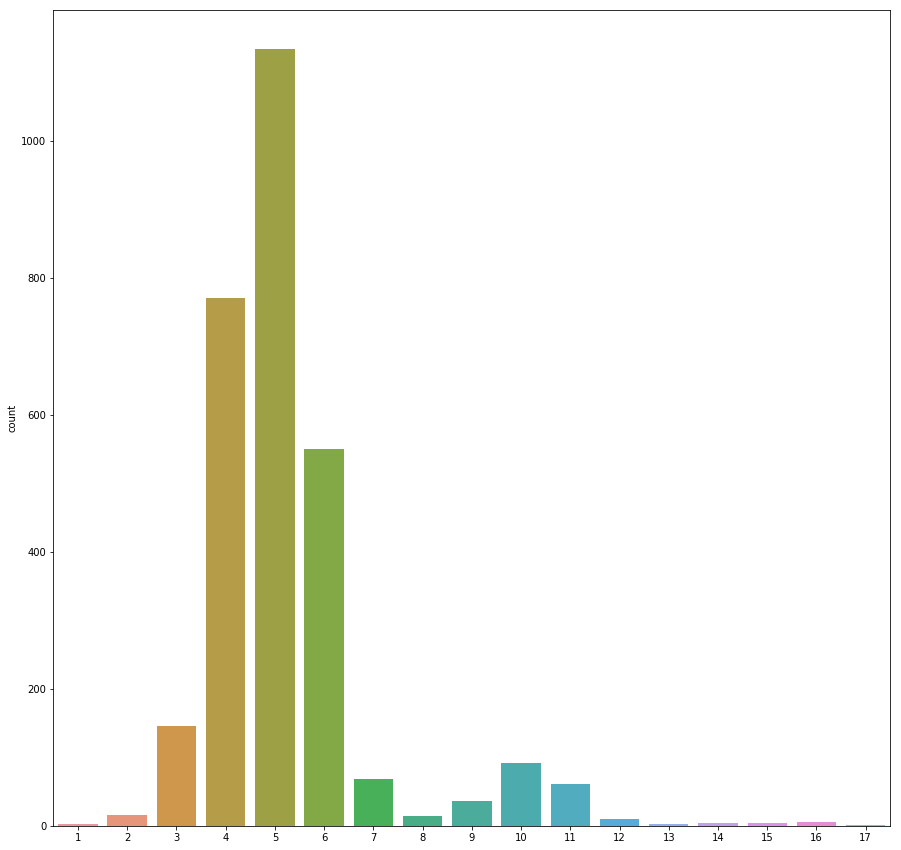

In [33]:
fig = plt.figure(figsize=(15, 15))
sns.countplot(all_data.isnull().sum(axis=1))

# Analyze data column by column

### MSSubClass

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

##### Although this data looks numeric, it is categorical as shown in the description

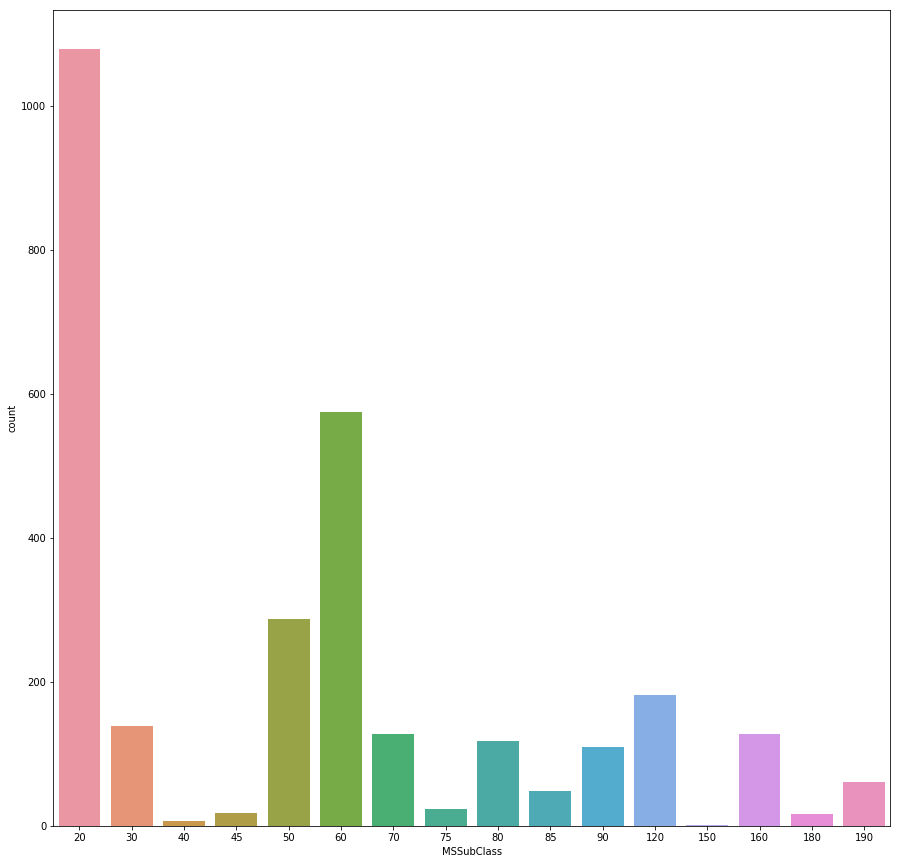

In [34]:
fig = plt.figure(figsize=(15, 15))
sns.countplot(all_data['MSSubClass'])

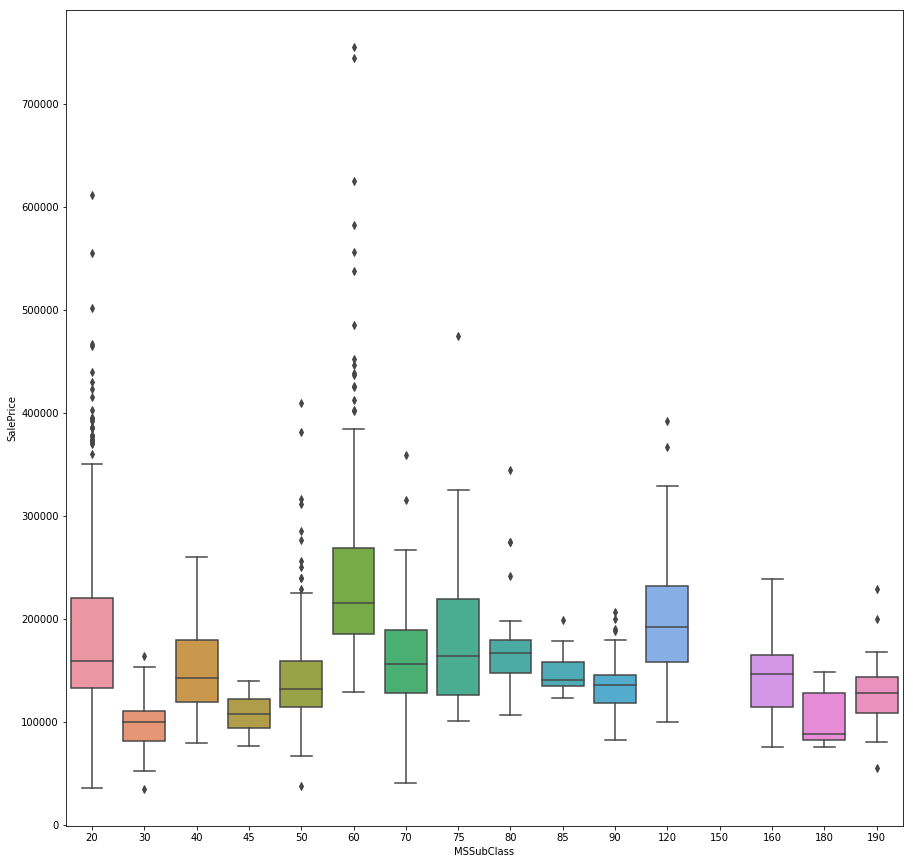

In [35]:
fig = plt.figure(figsize=(15, 15))
sns.boxplot(all_data['MSSubClass'], all_data['SalePrice'])

##### Check if any data is missing

In [36]:
all_data['MSSubClass'].isnull().sum()

0

##### Convert to dummy variables

In [37]:
MSSubClass_dummies = pd.get_dummies(all_data['MSSubClass'], prefix='MSSubClass', drop_first=True)
MSSubClass_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [38]:
new_data = MSSubClass_dummies
new_data.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


### MSZoning

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [40]:
all_data['MSZoning'].isnull().sum()

4